# Regressão Linear

## Conceitos

A **Regressão Linear** é um algoritmo de Machine Learning que tenta prever um valor contínuo/ variável dependente (**Y**) dado alguma variável independente (**X**). O algoritmo é definido pela equação da reta:

$Y = B0 + B1 \cdot X$

$previsão = \text{intersecção} + \text{inclinação} \cdot \text{valor A prever}$


Onde B0 e B1 são calculados por:

$B1 = C(X,Y)*\dfrac{\sigma (X)}{\sigma (Y)}$

$B0=\bar Y-B1*\bar X$

Onde,

- X é a variável independente;
- Y é a variável dependente;
- $\bar X$ e $\bar Y$ é a média de X e a média de Y;
- $\sigma (X)$ e $\sigma (Y)$ é o desvio-padrão de X e o desvio-padrão de Y
- C(X,Y) é a correlação normalizada entre X e Y, dada pela seguinte fórmula:

$C(X,Y) = \dfrac{\sum (X-\bar X)(Y-\bar Y)}{\sqrt{\sum (X-\bar X)^2\sum (Y-\bar Y)^2}}$

A **Correlação** mostra a força e direção da relação entre variáveis, ela varia ente 1 e -1, quanto mais próximo do 0 mais fraca essa relação é

OBS: Correlação não indica Causalidade


## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

## Initial data processing

In [2]:
df = pd.read_csv('data\\CasasParaAlugar.csv')
df = df.drop(['Unnamed: 0','city', 'animal','furniture','floor'], axis=1)
df = df.replace('-', 0)
df.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70.0,2.0,1.0,1.0,2065.0,3300.0,211.0,42.0,5618.0
1,320.0,4.0,NaN,0.0,1200.0,4960.0,1750.0,63.0,7973.0
2,80.0,1.0,1.0,1.0,1000.0,2800.0,NaN,41.0,3841.0
3,51.0,2.0,1.0,0.0,270.0,1112.0,22.0,17.0,1421.0
4,25.0,NaN,1.0,NaN,0.0,800.0,25.0,11.0,836.0


In [3]:
df.shape

(10692, 9)

In [4]:
df.dtypes

area                   float64
rooms                  float64
bathroom               float64
parking spaces         float64
hoa (R$)               float64
rent amount (R$)       float64
property tax (R$)      float64
fire insurance (R$)    float64
total (R$)             float64
dtype: object

In [5]:
df.isna().sum()

area                   1019
rooms                  1021
bathroom               1025
parking spaces         1008
hoa (R$)               1022
rent amount (R$)       1024
property tax (R$)      1012
fire insurance (R$)    1022
total (R$)             1006
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(4321, 9)

## Correlograma

Mostra os coeficientes de correlação entre os atributos



In [8]:
corr = df.corr()

<Axes: >

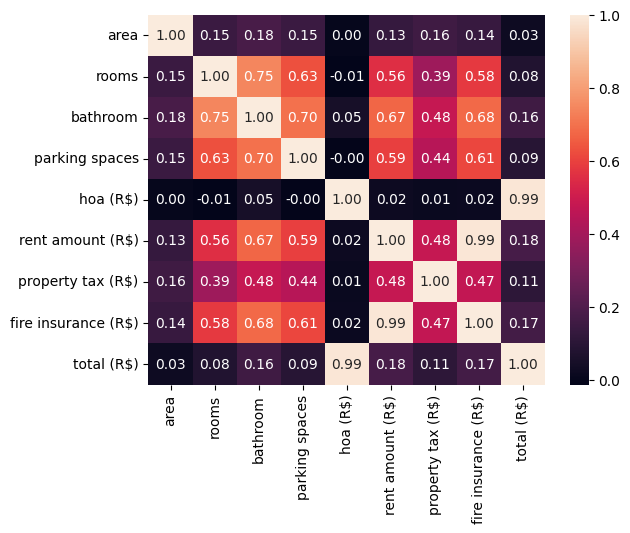

In [9]:
corr = df.corr()
sns.heatmap(corr, annot = True, fmt='.2f')

## Dispersão

(4321, 1) (4321, 1)


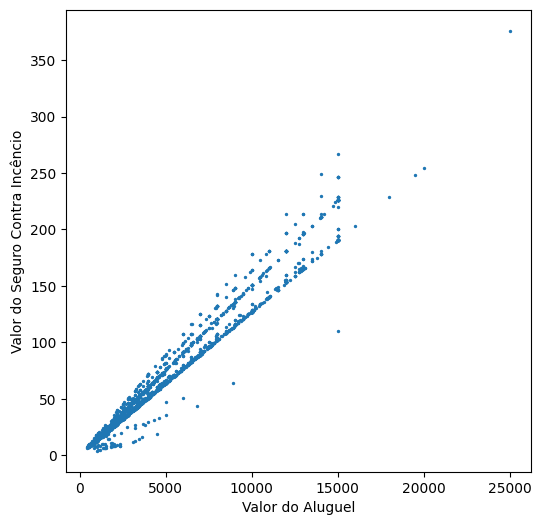

In [14]:
x = df['rent amount (R$)'].values.reshape(-1,1)
y = df['fire insurance (R$)'].values.reshape(-1,1)

print(x.shape, y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.xlabel('Valor do Aluguel')
plt.ylabel('Valor do Seguro Contra Incêncio')

plt.show()

## Implementação da Regressão Linear

In [11]:
#def intersecção(x,y):
    


'''def inclinação(x,y):
    inclinação = corr(x,y) * (np.std(x)/np.std(y))
    return inclinação'''

#def previsão():

'def inclinação(x,y):\n    inclinação = corr(x,y) * (np.std(x)/np.std(y))\n    return inclinação'

## Regressão Linear do Scikit-learn

B0 = [-0.58208839]
B1 = [[0.01382945]]


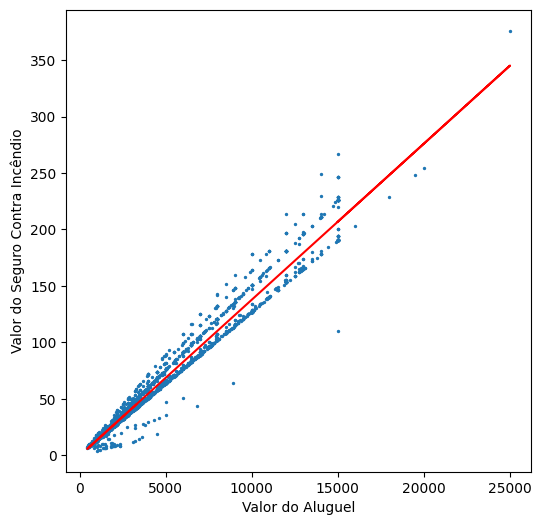

In [15]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x, y)

print(f'B0 = {modelo.intercept_}\nB1 = {modelo.coef_}')

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, modelo.predict(x), c='red')
plt.xlabel('Valor do Aluguel')
plt.ylabel('Valor do Seguro Contra Incêndio')

plt.show()

In [ ]:
##

## Coeficiente de Determinação ($R^2$) 

Mostra quanto o modelo consegue explicar os valores

Mede quanto a mudança da saída é explicada pela mudança na entrada

Varia entre 0 e 1

O resto da variabilidade está em variáveis fora do modelo



## Métricas para Regressão

OBS: Deve ser comparada com o contexto e outras métricas


### Mean Absolute Erro (MAE): 
Média da diferença absoluta entre os valores reais e os valores previstos

Baixo Custo Computacional

Depende da Escala

Pode existir mais de uma reta que gera a mesma soma de erro

### Root Mean Squared Error (RMSE): 
Desvio-Padrão da diferença entre os valores reais e os valores previstos

Somente uma reta Ótima/Melhor Ajuste

Maior Custo Computacional

Cresce com a quantidade de dados